## Datamodules
Datamodules are a way to organize your data and make it accessible to your models. They are used by the `Trainer` to provide data to your `LightningModule` during training, validation, and testing. They directly provide a Dataloaders for training, validation, and testing. Here are the relevant datamodules:

['a1959422-357f-11eb-b8d5-001a7dda7111']


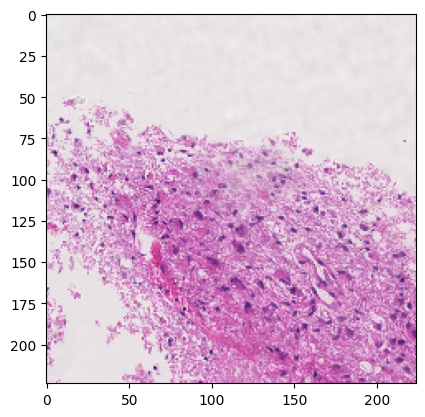

In [1]:
# Load In-Distribution Data
from src.datamodules.vienna_datamodule import ViennaDataModule
import matplotlib.pyplot as plt

datamodule_id = ViennaDataModule(slides_file= '/n/data2/hms/dbmi/kyu/lab/jz290/BRAIN_20X/',batch_size=1, num_workers=0)
datamodule_id.setup()

dataloader = datamodule_id.train_dataloader()

for i, batch in enumerate(dataloader):
    print(batch["patient_id"])
    plt.imshow(batch["image"][0].permute(1,2,0))
    plt.show()
    if i == 0:
        break

Number of images in the dataset:  71393
extra_ood False


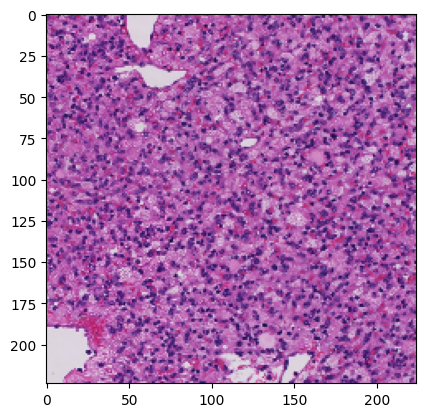

In [2]:
# Load Out-Of-Distribution Data
from src.datamodules.ebrain_datamodule import EbrainDataModule
datamodule_ood = EbrainDataModule(slides_file='/n/data2/hms/dbmi/kyu/lab/shl968/tile_datasets/EBrain_OOD_1000dense_max500_Q0.95_SY_level1', batch_size=1, num_workers=0)
datamodule_ood.setup()

dataloader = datamodule_ood.train_dataloader()

for i, batch in enumerate(dataloader):
    plt.imshow(batch["image"][0].permute(1,2,0))
    plt.show()
    if i == 0:
        break

Number of images in the dataset:  71393
extra_ood True
Number of images in the dataset + extra:  94940


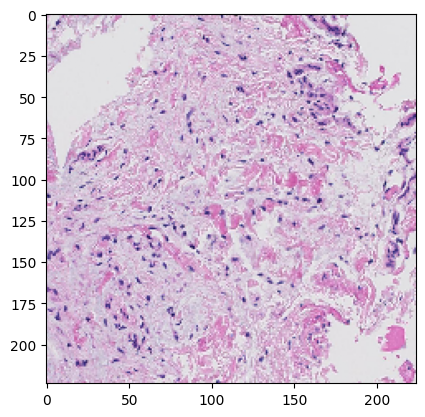

In [3]:
# Load Out-of-Distribution Data with extra OOD
datamodule_ood_extra = EbrainDataModule(slides_file='/n/data2/hms/dbmi/kyu/lab/shl968/tile_datasets/EBrain_OOD_1000dense_max500_Q0.95_SY_level1', batch_size=1, num_workers=0, extra_ood=True)
datamodule_ood_extra.setup()

dataloader = datamodule_ood_extra.train_dataloader()

for i, batch in enumerate(dataloader):
    plt.imshow(batch["image"][0].permute(1,2,0))
    plt.show()
    if i == 0:
        break

### Datasets 
A datamodule consists of a dataset. Here are the relevant datasets along with their size.

In [ ]:

for (dataset, datamodule_name) in [[datamodule_id, "ID"], [datamodule_ood, "OOD"], [datamodule_ood_extra, "OOD_EXTRA"]]:
    print(datamodule_name)
    print("Train: ", len(dataset.data_train))
    print("Val: ", len(dataset.data_val))
    print("Test: ", len(dataset.data_test))
    print("Total: ", len(dataset.data_train) + len(dataset.data_test) + len(dataset.data_val))
    print("------------------")
